In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(40,24)})

## Brug af hashtags over tid

In [42]:
tweets = pd.read_csv('pol-tweets_janjul2020_subset.csv')
tweets.head()

,id,name,username,date,hashtags,tweet
0,1276394982811807745,Josephine Fock,josephinefock,2020-06-26,['#dkpol'],Hvorfor går man ikke i dialog med ⁦@DRC_dk⁩ i ...
1,1276116154793295873,Josephine Fock,josephinefock,2020-06-25,[],Alle tæller ❤️ https://twitter.com/cekicozlem/...
2,1275714928343728128,Josephine Fock,josephinefock,2020-06-24,[],Det er så godt arbejde💚 https://twitter.com/fa...
3,1274847089961336836,Josephine Fock,josephinefock,2020-06-22,"['#dkpol', '#dkgreen']","Tilfreds med den klima og energiaftale, der er..."
4,1273948042475995138,Josephine Fock,josephinefock,2020-06-19,"['#dkpol', '#dkgreen']",Godt første skridt for den fri natur #dkpol #d...


<AxesSubplot:xlabel='date', ylabel='count'>

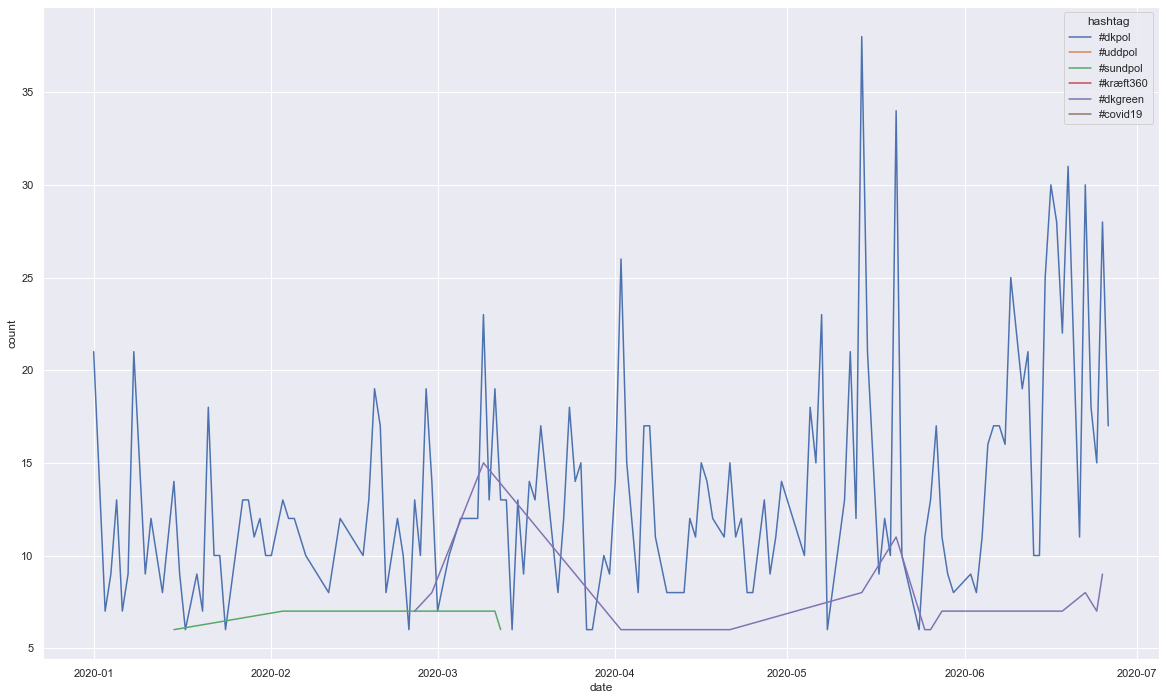

In [46]:
tweets_hashtags = tweets.loc[:, ['id', 'date', 'hashtags', 'name']]
tweets_hashtags['hashtags'] = tweets_hashtags['hashtags'].apply(lambda x: x.replace("\'", "").strip('][').split(', '))

hashtags = tweets_hashtags['hashtags'].apply(pd.Series)

tweets_hashtags = tweets_hashtags.merge(hashtags, right_index = True, left_index = True).drop(columns = ['hashtags'])
tweets_hashtags = tweets_hashtags.melt(id_vars = ['id', 'date', 'name'], value_name = 'hashtag')

tweets_hashtags['hashtag'] = tweets_hashtags['hashtag'].replace("", np.NaN)
tweets_hashtags = tweets_hashtags.dropna()

tweets_time = tweets_hashtags.groupby(['date', 'hashtag'])

tweets_timecount = tweets_time.size().to_frame(name = 'count').reset_index()
tweets_timecount['date'] = pd.to_datetime(tweets_timecount['date'], format='%Y-%m-%d')
tweets_timecount = tweets_timecount.loc[tweets_timecount['count'] > 5, :]

sns.set(rc={'figure.figsize':(20,12)})
sns.lineplot(data = tweets_timecount, x = 'date', y = 'count', hue = 'hashtag')

## Politikeres aktivitet

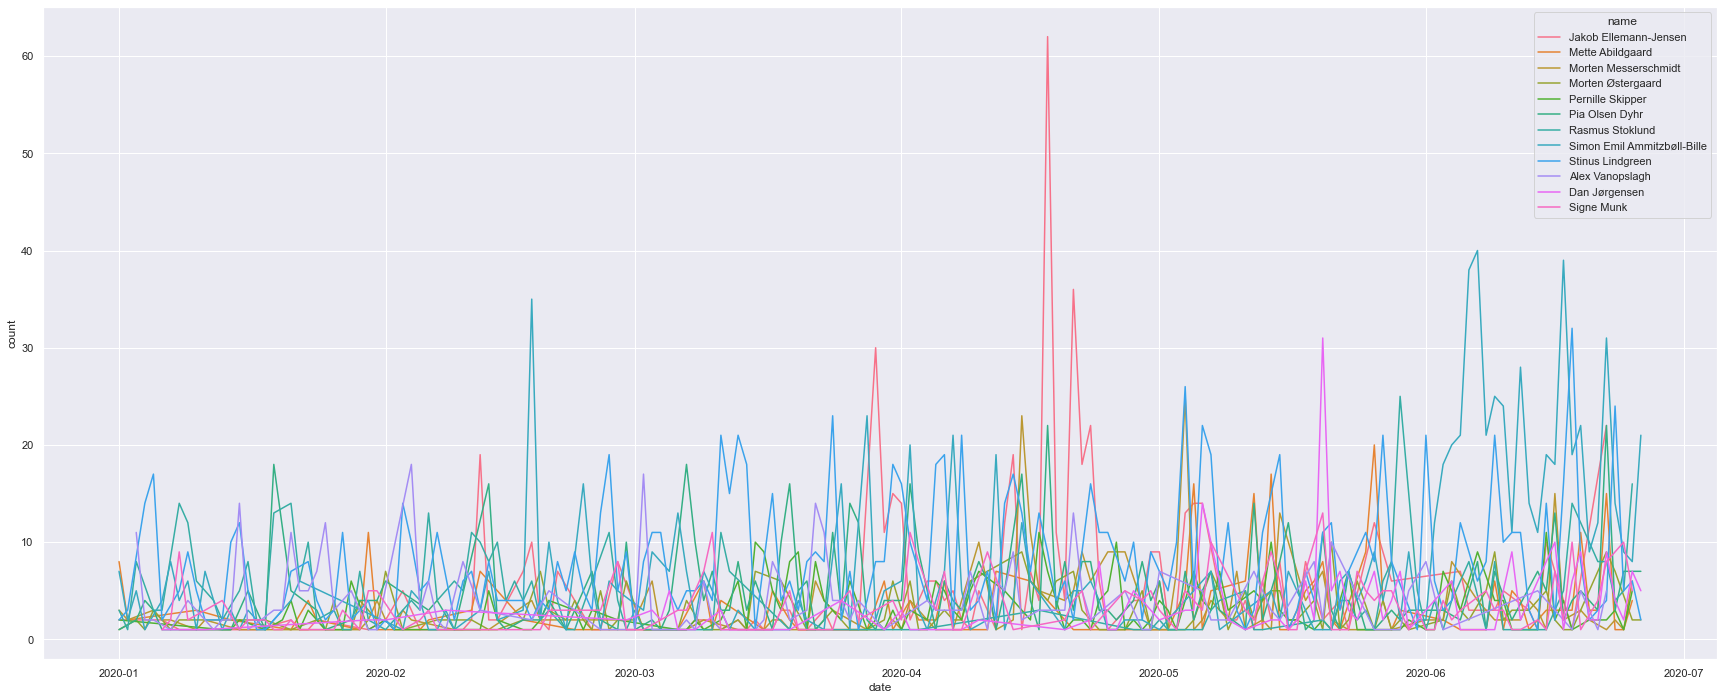

In [47]:
df = tweets.loc[:, ['id', 'date', 'name']]
df_user = df.groupby(['date', 'name']).size().to_frame(name = 'count').reset_index()
df_user['date'] = pd.to_datetime(df_user['date'], format='%Y-%m-%d')

df_usercount = df.groupby(['name']).size().to_frame(name = 'count').reset_index()
count_quant = np.quantile(df_usercount['count'], 0.50)
df_usercount['keep'] = np.where(df_usercount['count'] > count_quant, True, False)

df_user = df_user.merge(df_usercount.loc[:, ['name', 'keep']], on = 'name')
df_user_filter = df_user.loc[df_user['keep'] == True, :]

sns.set(rc={'figure.figsize':(30,12)})
sns.lineplot(data = df_user_filter, x = 'date', y = 'count', hue = 'name')